In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load housing price data
file_path = 'Housing_Price_Data.csv'  # ensure this path matches your file location
data = pd.read_csv(file_path)

KeyError: 'cbathrooms'

In [4]:
# define function to convert 2d coordinates to 1d hilbert curve index
def xy2d(n, x, y):
    d = 0
    s = n // 2
    while s > 0:
        rx = (x & s) > 0
        ry = (y & s) > 0
        d += s * s * ((3 * rx) ^ ry)
        x, y = rot(s, x, y, rx, ry)
        s //= 2
    return d

# define rotation function for hilbert curve calculation
def rot(n, x, y, rx, ry):
    if ry == 0:
        if rx == 1:
            x = n-1 - x
            y = n-1 - y
        x, y = y, x
    return x, y

In [5]:
# set grid size for hilbert curve, adjust based on data distribution
n = 2 ** 12

# normalize area and composite score
max_area = data['area'].max()
max_score = data['composite_score'].max()
data['normalized_area'] = data['area'] / max_area
data['normalized_score'] = data['composite_score'] / max_score

# scale normalized values without applying floor to keep them continuous
scaled_area = data['normalized_area'] * n
scaled_score = data['normalized_score'] * n

In [6]:
# calculate hilbert indices for normalized area and composite score
indices = np.array([xy2d(n, int(area), int(score)) for area, score in zip(scaled_area, scaled_score)])

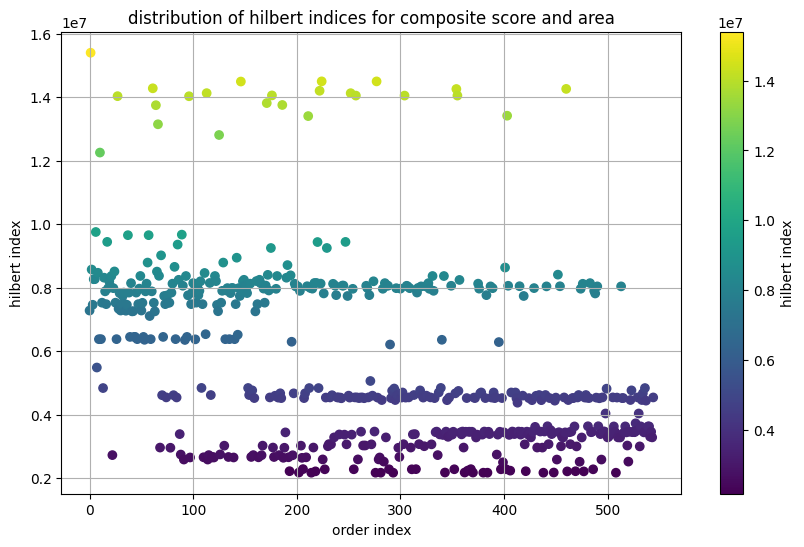

In [7]:
# visualize hilbert indices distribution
plt.figure(figsize=(10, 6))
plt.scatter(data['order_index'], indices, c=indices, cmap='viridis', marker='o')
plt.colorbar(label='hilbert index')
plt.xlabel('order index')
plt.ylabel('hilbert index')
plt.title('distribution of hilbert indices for composite score and area')
plt.grid(True)
plt.show()

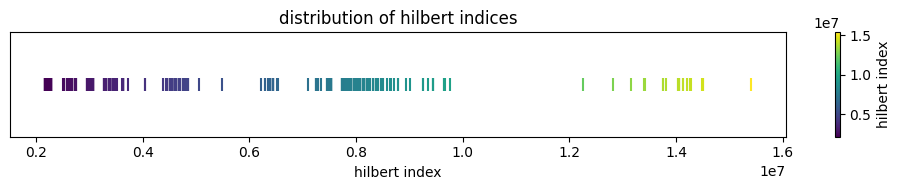

In [8]:
# visualize distribution of hilbert indices
plt.figure(figsize=(10, 2))
plt.scatter(indices, np.zeros_like(indices), c=indices, cmap='viridis', marker='|', s=100)
plt.colorbar(label='hilbert index')
plt.title('distribution of hilbert indices')
plt.yticks([])
plt.xlabel('hilbert index')
plt.tight_layout()
plt.show()

In [9]:
def plot_hilbert_vs_price_binary(data, indices, price_column='price', binary_column='hotwaterheating', figsize=(10, 6), xlabel='Hilbert Index', ylabel='Price', title='Hilbert Index vs. Price', color_map=None):
    """
    Plots Hilbert indices against property prices and colors points based on a binary column.

    Parameters:
    - data: DataFrame containing the property data.
    - indices: Array of Hilbert indices corresponding to properties in `data`.
    - price_column: String, the name of the column in `data` that contains property prices.
    - binary_column: String, the name of the binary column to color the points by.
    - figsize: Tuple, the size of the figure.
    - xlabel: String, label for the x-axis.
    - ylabel: String, label for the y-axis.
    - title: String, title of the plot.
    - color_map: Dictionary, mapping binary values to colors.
    """
    plt.figure(figsize=figsize)
    
    # Check if color_map is provided, otherwise use default colors
    if color_map is None:
        color_map = {'yes': 'cyan', 'no': 'red'}

    # Extract colors from the binary_column using the color map
    if binary_column in data.columns:
        colors = data[binary_column].map(color_map)
    else:
        raise ValueError(f"Column {binary_column} does not exist in the DataFrame.")
    
    plt.scatter(indices, data[price_column], c=colors, alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

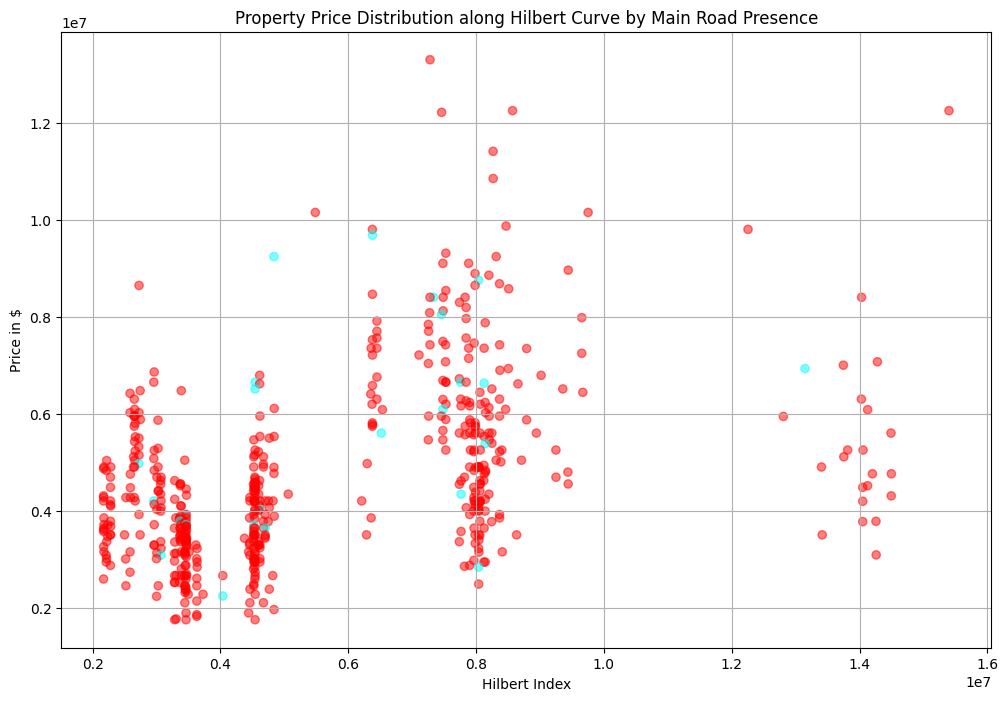

In [10]:
# Example call to the function with a binary column 'mainroad'
plot_hilbert_vs_price_binary(data, indices, price_column='price', binary_column='hotwaterheating', figsize=(12, 8), xlabel='Hilbert Index', ylabel='Price in $', title='Property Price Distribution along Hilbert Curve by Main Road Presence')

In [15]:
def d2xy(n, d):
    x = y = 0
    s = 1
    t = d
    while s < n:
        rx = 1 & (t // 2)
        ry = 1 & (t ^ rx)
        x, y = rot(s, x, y, rx, ry)
        x += s * rx
        y += s * ry
        t //= 4
        s *= 2
    print(x,y)
    return x, y


In [16]:
# assuming `indices` is an array or list of Hilbert indices and `n` is defined as the size of the grid
for d in indices:
    x, y = d2xy(n, d)
    print(f"Hilbert index: {d} => (x, y): ({x}, {y})")

1876 3072
Hilbert index: 7279536 => (x, y): (1876, 3072)
2265 0
Hilbert index: 15399915 => (x, y): (2265, 0)
2518 2389
Hilbert index: 8571015 => (x, y): (2518, 2389)
1896 2730
Hilbert index: 7461006 => (x, y): (1896, 2730)
1876 2389
Hilbert index: 8266273 => (x, y): (1876, 2389)
1896 2389
Hilbert index: 8267633 => (x, y): (1896, 2389)
2169 3754
Hilbert index: 9753485 => (x, y): (2169, 3754)
0 3413
Hilbert index: 5484859 => (x, y): (0, 3413)
2048 2389
Hilbert index: 8469267 => (x, y): (2048, 2389)
1453 3072
Hilbert index: 6377211 => (x, y): (1453, 3072)
3337 2048
Hilbert index: 12255467 => (x, y): (3337, 2048)
1517 3072
Hilbert index: 6378737 => (x, y): (1517, 3072)
1656 2730
Hilbert index: 7526788 => (x, y): (1656, 2730)
884 2730
Hilbert index: 4838262 => (x, y): (884, 2730)
1972 2389
Hilbert index: 8314401 => (x, y): (1972, 2389)
1517 2389
Hilbert index: 7884232 => (x, y): (1517, 2389)
1668 2730
Hilbert index: 7480948 => (x, y): (1668, 2730)
2149 3072
Hilbert index: 9442323 => (x, y):

1876 3072
2265 0
2518 2389
1896 2730
1876 2389
1896 2389
2169 3754
0 3413
2048 2389
1453 3072
3337 2048
1517 3072
1656 2730
884 2730
1972 2389
1517 2389
1668 2730
2149 3072
1163 2389
1623 2389
1092 2048
1809 2048
2035 1706
1152 2389
2224 2389
1653 2730
1517 3072
2243 1706
2010 3072
1390 2730
1889 3072
1769 2730
1233 2730
1506 2730
1729 2730
1769 3072
1891 2730
2275 3413
1517 2730
1517 3413
1656 2048
1608 3072
1638 3072
1517 3413
1517 3413
1517 2730
1517 3072
1668 2730
1087 2389
1881 2048
1881 3072
1599 2730
1517 3413
1302 3072
1517 2389
1517 2048
2892 2389
2275 3413
1941 3413
1517 3072
1517 2389
2245 1365
1577 2730
1608 3072
2825 1706
2245 2389
3337 1365
1946 2048
1517 1706
3056 2730
1011 2389
1517 3413
1269 2730
1668 2730
1021 2048
1077 2730
1623 2730
1643 2730
1441 1706
1517 2730
1517 2048
1011 2389
2654 2048
1517 3072
950 2048
2085 2730
1686 2389
1001 1706
1873 1706
2169 3413
1264 2048
1706 1365
1213 3072
1820 2048
1517 3413
1036 2730
2275 1706
1618 1706
1668 2730
1517 2730
1668 204

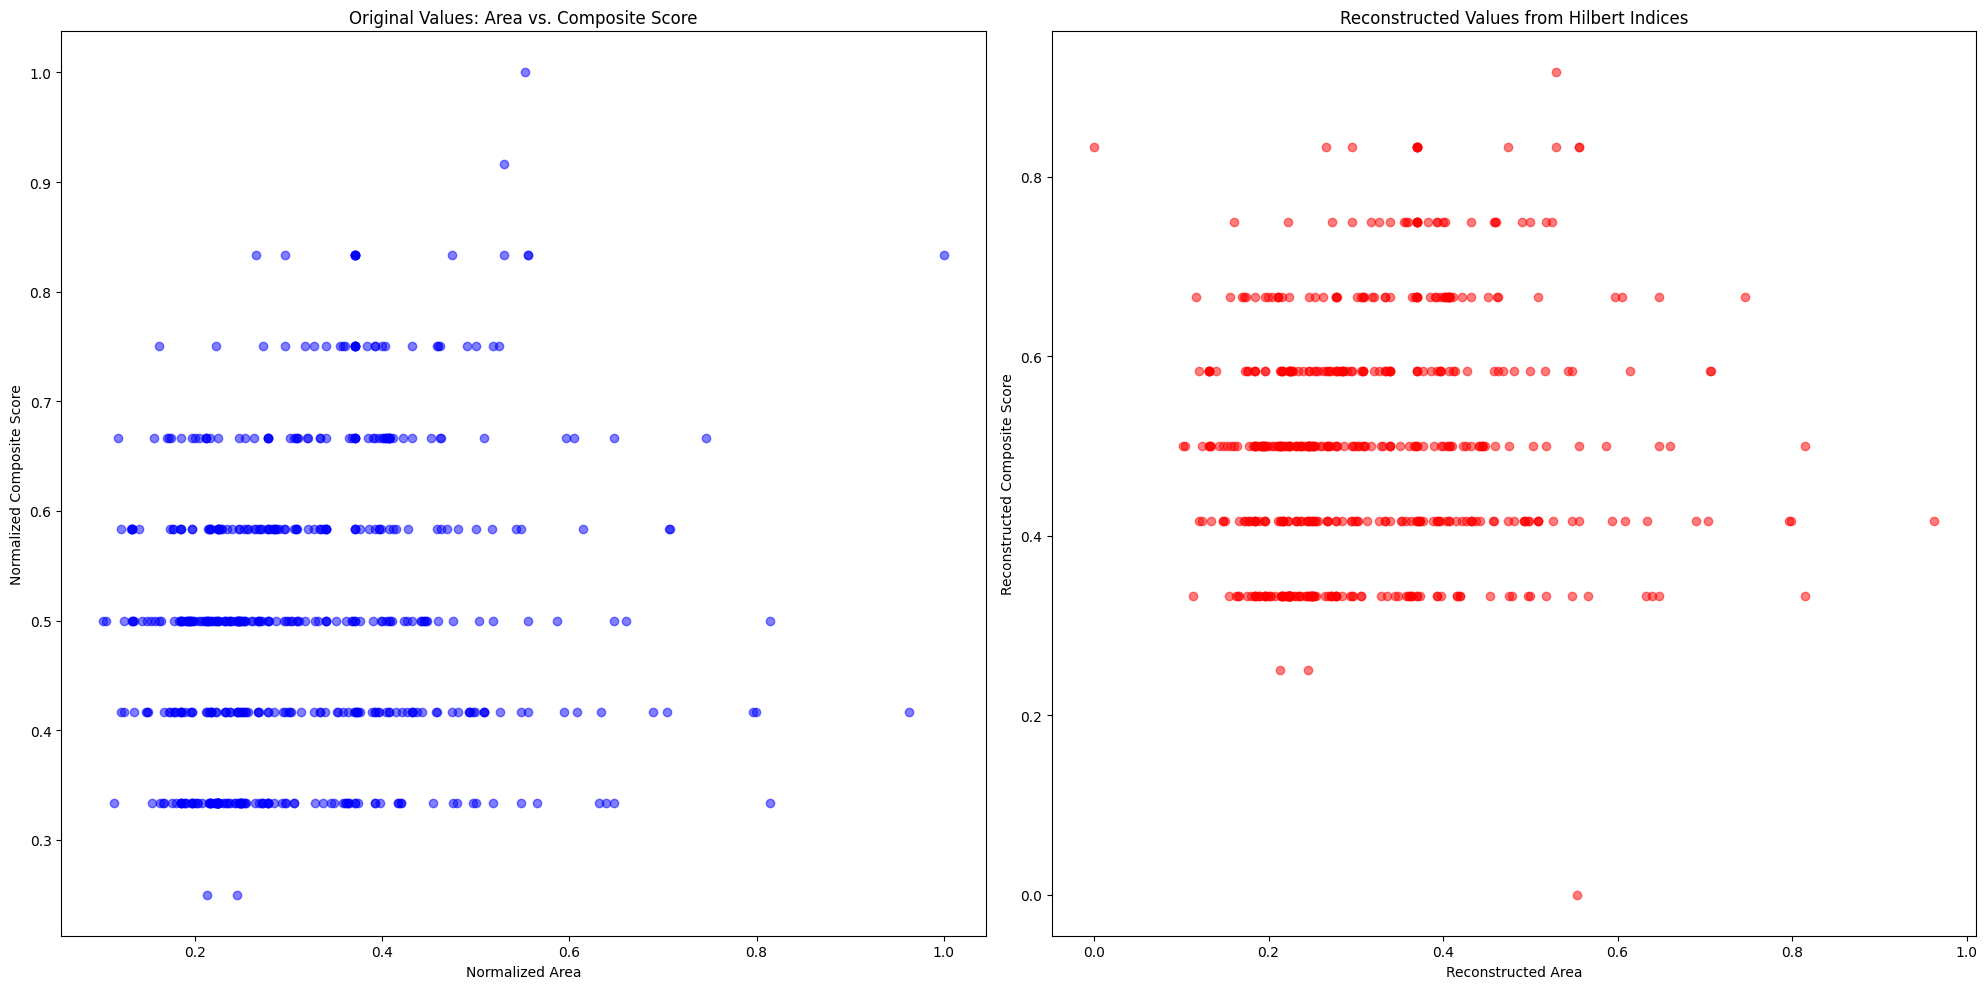

In [17]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# plot original composite score vs area
ax1.scatter(data['normalized_area'], data['normalized_score'], color='blue', alpha=0.5)
ax1.set_title('Original Values: Area vs. Composite Score')
ax1.set_xlabel('Normalized Area')
ax1.set_ylabel('Normalized Composite Score')

# reconstruct x and y values from hilbert indices and plot them
reconstructed = np.array([d2xy(n, d) for d in indices])
ax2.scatter(reconstructed[:, 0] / n, reconstructed[:, 1] / n, color='red', alpha=0.5)
ax2.set_title('Reconstructed Values from Hilbert Indices')
ax2.set_xlabel('Reconstructed Area')
ax2.set_ylabel('Reconstructed Composite Score')

# display the plots
plt.tight_layout()
plt.show()